<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 인공 신경망의 한계와 딥러닝 출현**

- 오늘날 인공 신경망에서 이용하는 구조는 퍼셉트론이라는 선형 분류기이다.
- 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력하는데, 이 신호를 1 또는 0 정보를 앞으로 전달하는 원리로 작동한다.

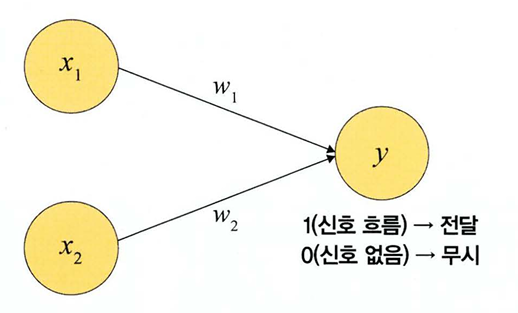

---



**<AND 게이트>**
- AND 게이트는 모든 입력이 1일 때 작동한다.
- 입력 중 어떤 하나라도 0을 갖는다면 작동을 멈춘다.

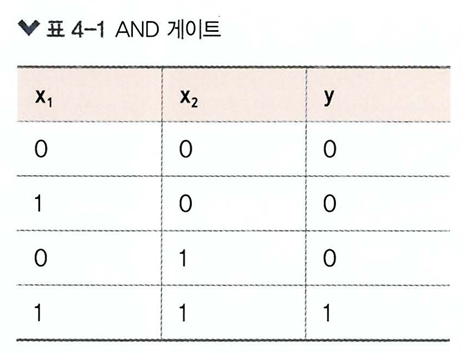

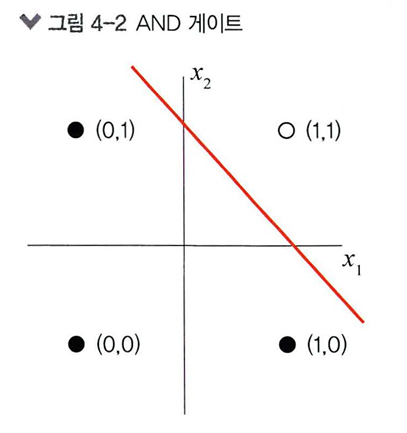

**<OR 게이트>**
- OR 게이트는 입력에서 둘 중 하나만 1이거나 둘 다 1 일 때 작동한다.
- 즉, 입력 모두가 0을 갖는 경우를 제외한 나머지가 모두 1 값을 갖는다.

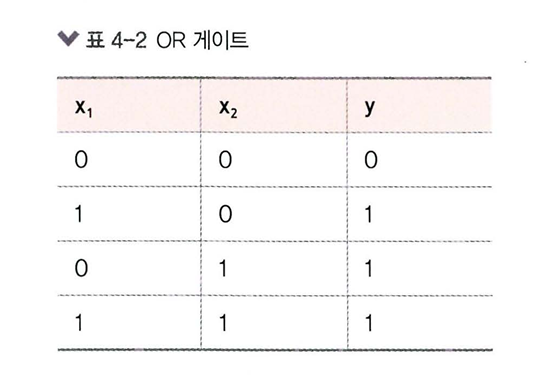

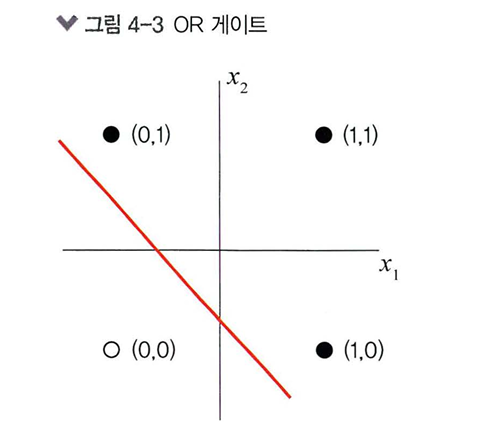

**<XOR 게이트>**
- 입력 두 개 중 한 개만 1일 때 작동하는 논리 연산이다.

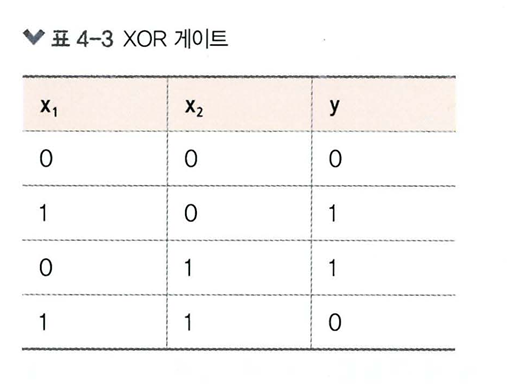

- XOR 게이트는 데이터가 비선형적으로 분리되기 때문에 제대로 된 분류가 어렵다.
- 즉, AND, OR 연산에 대해서는 학습을 가능하지만, XOR에 대해서는 학습이 불가능하다.

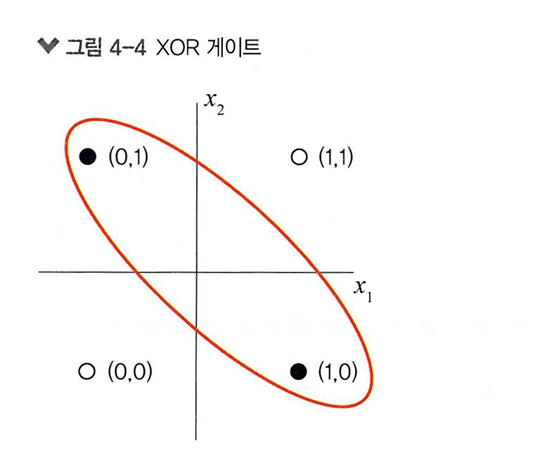

- 이를 극복하는 방안으로 입력층과 출력층 사이에 하나 이상의 중간층을 두어 비선형적으로 분리되는 데이터에 대해서도 학습이 가능하도록 다층 퍼셉트론을 고안한다.

# **4.2 딥러닝 구조**

**4.2.1 딥려닝 용어**

- 딥러닝은 입력층, 출력층과 두 개 이상의 은닉층으로 구성되어 있다.

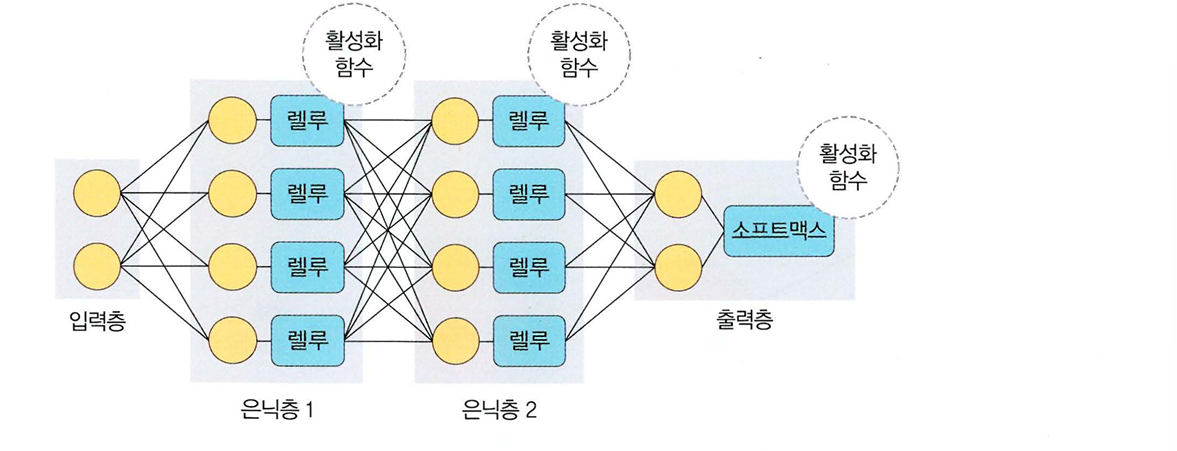

**가중치**
- 가중치는 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소이다.

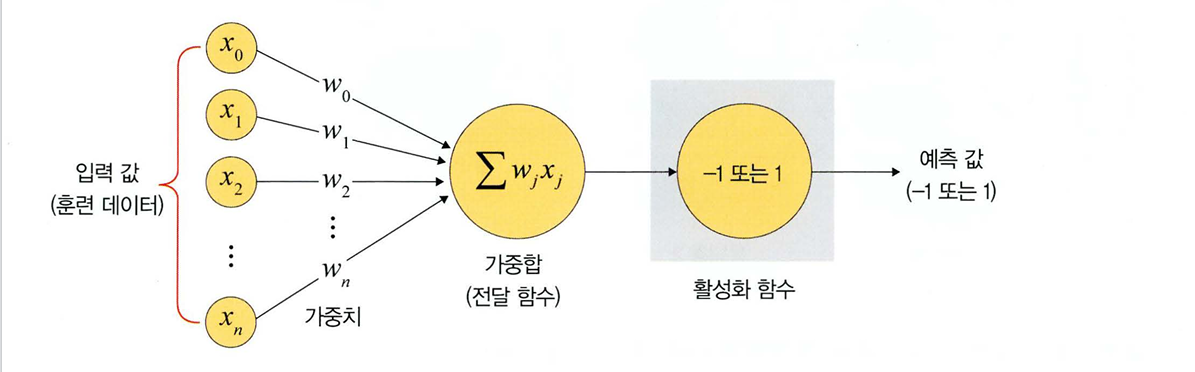

**가중합 또는 전달 함수**
- 가중합은 전달 함수라고도 하며, 각 노드에서 들어오는 신호에 가중치를 곱해서 다음 노드로 전달되는데 이 값들을 모두 더한 합계를 가중합이라고 한다.

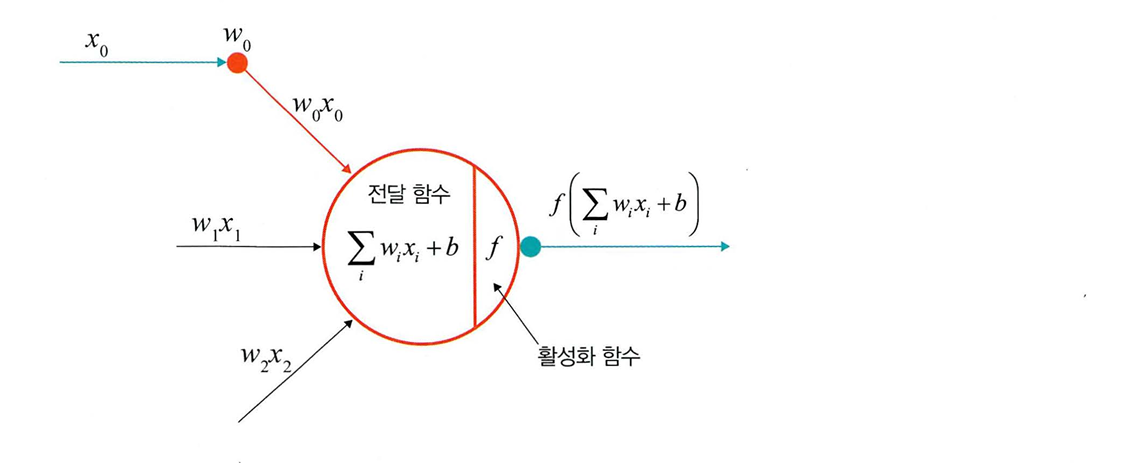

**활성화 함수**
- 활성화 함수는 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수이다.
- 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, 렐루 함수 등이 있다.

  ***시그모이드***

 - 시그모이드 함수는 선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형해준다.
  - 주로 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는 데 사용된다.
  - 기울기 소멸 문제가 발생하여 잘 사용되지는 않는다.

 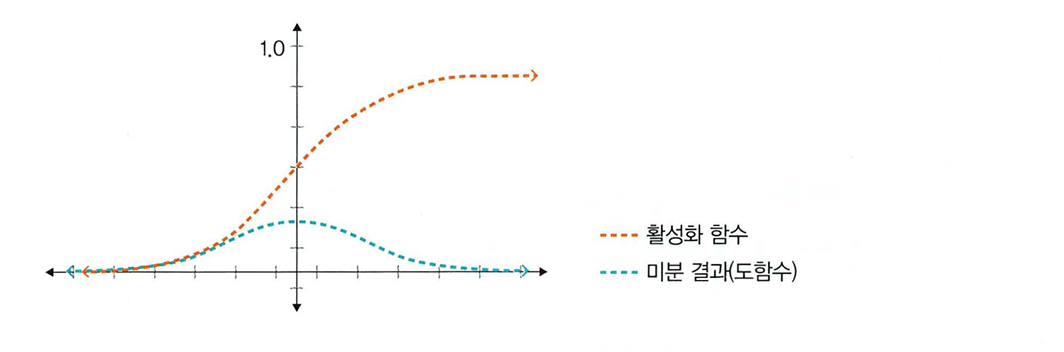

***하이퍼볼릭 탄젠트 함수***
- 하이퍼볼릭 탄젠트 함수는 선형 함수의 결과를 -1 ~ 1 사이에서 비선형 형태로 변형해준다.
- 시그모이드에서 결괏값의 평균이 0이 아닌 양수로 편향된 문제를 해결하는 데 사용했지만, 기울기 소멸 문제는 여전히 발생한다.

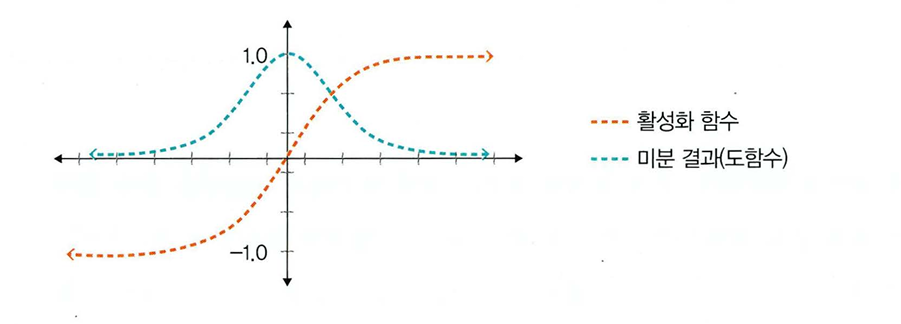

***렐루 함수***
- 렐루 함수는 입력이 음수일 때는 0을 출력하고, 양수일 때는 x를 출력한다.
- 경사 하강법에 영향을 주지 않아 학습 속도가 빠르고, 기울기 소멸 문제가 발생하지 않는 장점이 있다.
- 렐루 함수는 일반적으로 은닉층에서 사용되며, 하이퍼볼릭 탄젠트 함수 대비 학습 속도가 6배 빠르다.

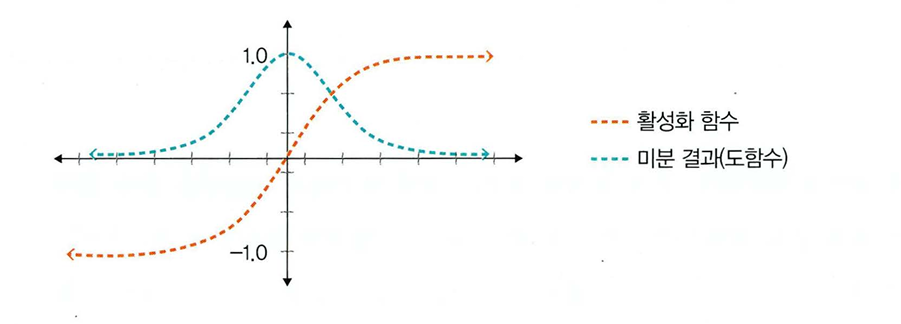

***리키 렐루 함수***
- 리키 렐루 함수는 입력 값이 음수이면 0이 아닌 0.001처럼 매우 작은 수를 반환한다.
- 입력 값이 수렴하는 구간이 제거되어 렐루 함수를 사용할 때 생기는 문제를 해결할 수 있다.

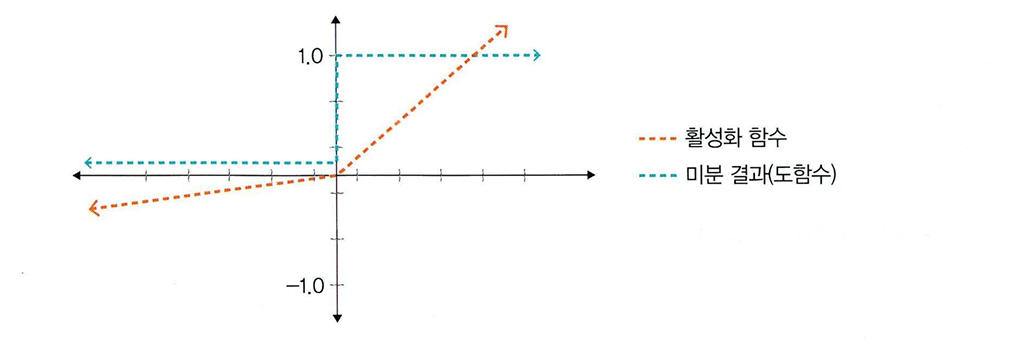

***소프트맥스 함수***
- 소프트맥스 함수는 입력 값을 0 ~ 1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 한다.

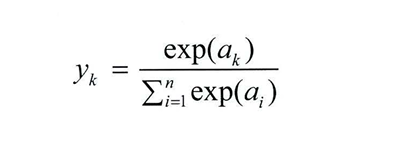


In [1]:
# 렐루 함수와 소프트맥스 함수를 구현하는 코드
import torch
import torch.nn as nn

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # ------ 은닉층
        self.relu = torch.nn.ReLU(inplace=True)
        self.out = torch.nn.Linear(n_hidden, n_output)      # ------ 출력층
        self.softmax = torch.nn.Softmax(dim=n_output)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)     # ------ 은닉층을 위한 렐루 활성화 함수
        x = self.out(x)
        x = self.softmax(x)  # ------ 출력층을 위한 소프트맥스 활성화 함수
        return x

**손실 함수**
- 경사 하강법은 학습률과 손실 함수의 순간 기울기를 이용하여 가중치를 업데이트하는 방법이다.
- 미분의 기울긱를 이용하여 오차를 비교하고 최소화하는 방향으로 이동시키는 방법이며, 이러한 오차를 구하는 방법이 손실 함수이다.

***평균 제곱 오차***
- 실제 값과 예측 값의 차이를 제곱하여 평균을 낸 것이 평균 제곱 오차(MSE)이다.
- 값이 작을수록 예측력이 좋다는 것을 의미한다.


<평균 제곱 오차를 구하는 수식>

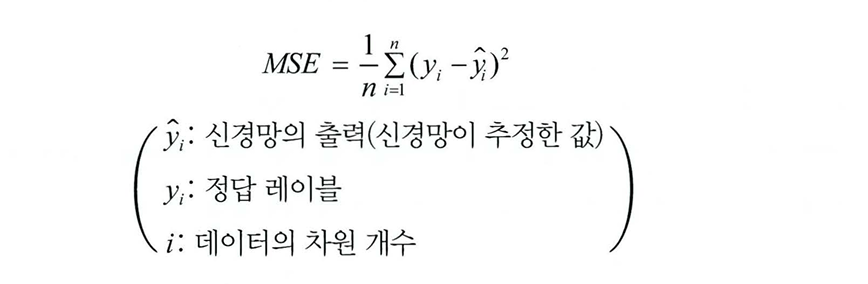

<파이토치 코드>

```
import torch

loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
```




***크로스 엔트로피 오차***
- 크로스 엔트로피 오차(CEE)는 분류 문제에서 원-핫 인코딩했을 때 사용할 수 있는 오차 계산법이다.
- 시그모이드의 특성인 기울기가 매끄럽지 못한 울퉁불퉁한 상태이며 학습 속도가 매우 느리다는 단점을 극복한 것이 크로스 엔트로피 오차이다.


<엔트로피를 구하는 수식>

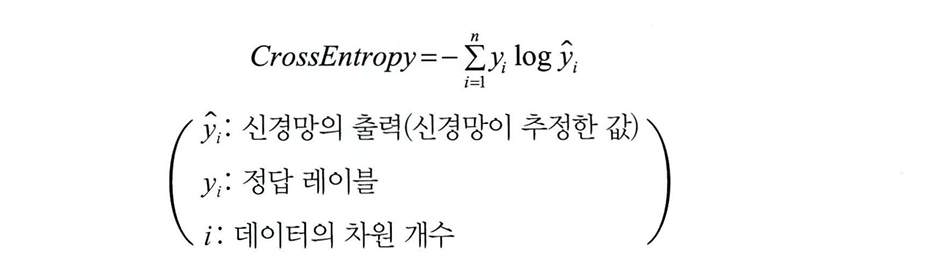

<파이토치 코드>


```
loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True)   # 평균이 0이고 표준편차가 1인 가우시안 정규분포
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)   # dtype torch.float32의 랜덤한 값으로 채워진 텐서 반환
output.backward()
```



**4.2.2 딥러닝 함수**
- 딥러닝 학습은 순전파와 역전파라는 두 단계로 진행된다.

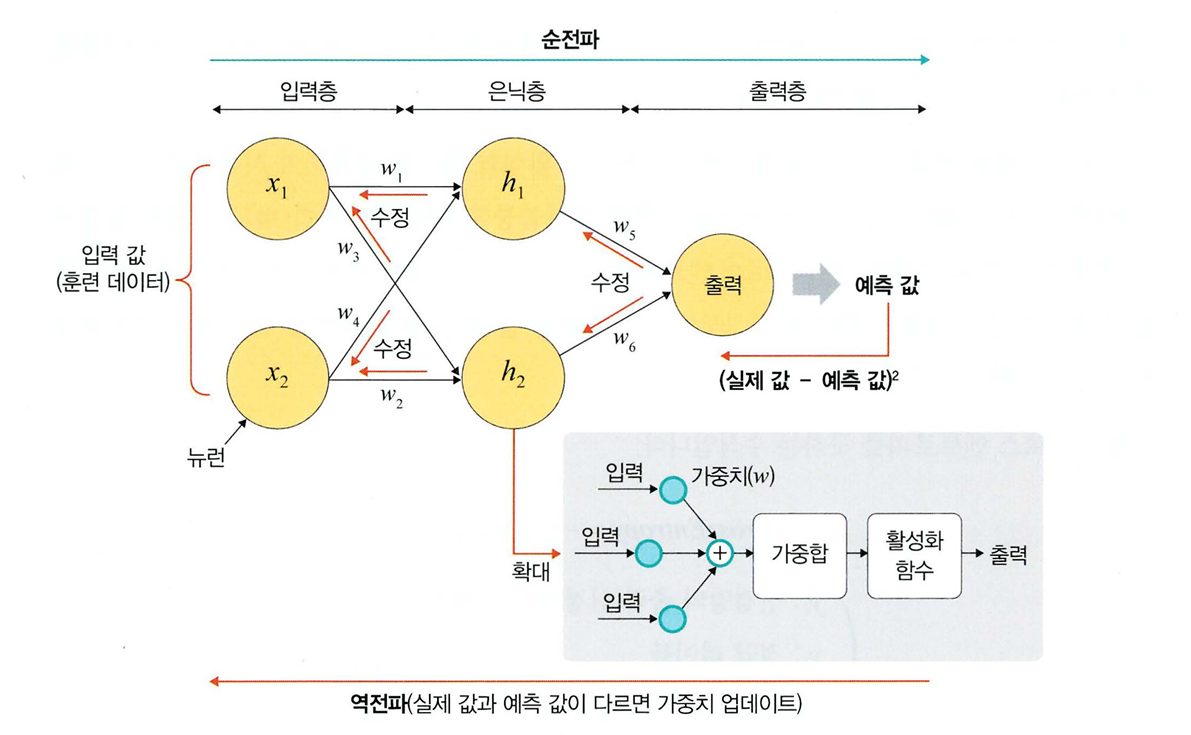

**1. 순전파**
- 순전파는 네트워크에 훈련 데이터가 들어올 때 발생하며, 데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 지나간다.
- 네트워크를 통해 입력 데이터를 전달하며, 데이터가 모든 층을 통과하고 모든 뉴런이 계산을 완료하면 그 예측 값은 최종 층에 도달하게 된다.

- 다음으로 손실 함수로 네트워크의 예측 값과 실제 값의 차이를 추정한다.
- 이때 손실 함수 비용은 0이 이상적이며 손실 함수 비용이 0에 가깝도록 하기 위해 모델이 훈련을 반복하면서 가중치를 조정한다.

**2. 역전파**
- 손실(오차)이 계산되면 그 정보는 역으로 전파(출력층 → 은닉층 → 입력층) 되기 때문에 역전파라고 한다.
- 출력층에서 시작된 손실 비용은 은닉층의 모든 뉴련으로 전파되지만, 은닉층은 뉴련은 각 뉴런이 원래 출력에 기여한 상대적 기여도에 따라 값이 달라진다.


이 과정을 출력층 → 은닉층 → 입력층 순서로 모든 뉴런에 대해 진행하여 계산된 각 뉴런 결과를 또다시 순전파의 가중치 값을 사용한다.

**4.2.3 딥러닝의 문제점과 해결 방안**
- 딥러닝의 핵심은 활성화 함수가 적용된 여러 은닉층을 결합하여 비선형 영역을 표현하는 것이다.
- 은닉층 개수가 많을수록 데이터 분류가 잘되고 있음을 확인할 수 있다.

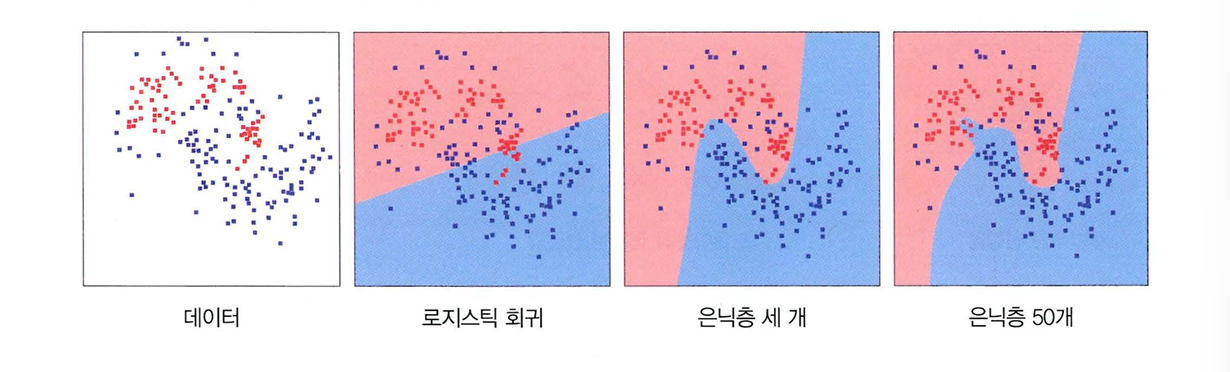

- 그러나 은닉층이 많을수록 다음 세 가지 문제점이 생긴다.

**과적합 문제 발생**
- 과적합은 훈련 데이터를 과하게 학습해서 발생한다.
- 일반적으로 훈련 데이터는 실제 데이터의 일부분이었으며, 훈련 데이터를 과하게 학습했기 때문에 예측 값과 실제 값 차이인 오차가 감소하지만, 검증 데이터에 대해서는 오차가 증가할 수 있다.
- 따라서 과적합은 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상을 의미한다.

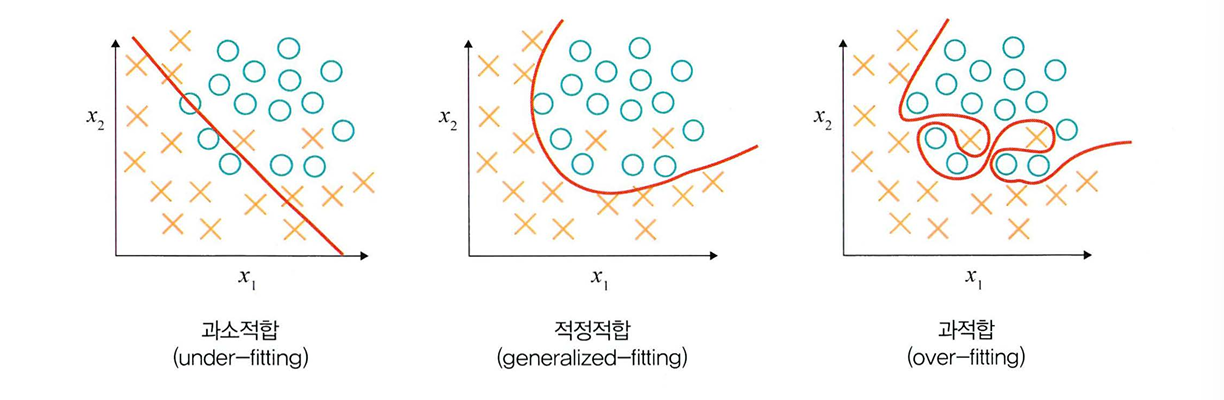

과적합을 해결하는 방법으로 드롭아웃이 있다.
- 신경망 모델이 과적합되는 것을 피하기 위한 방법으로, 학습 과정 중 임의로 일부 노드들을 학습에서 제외시킨다.

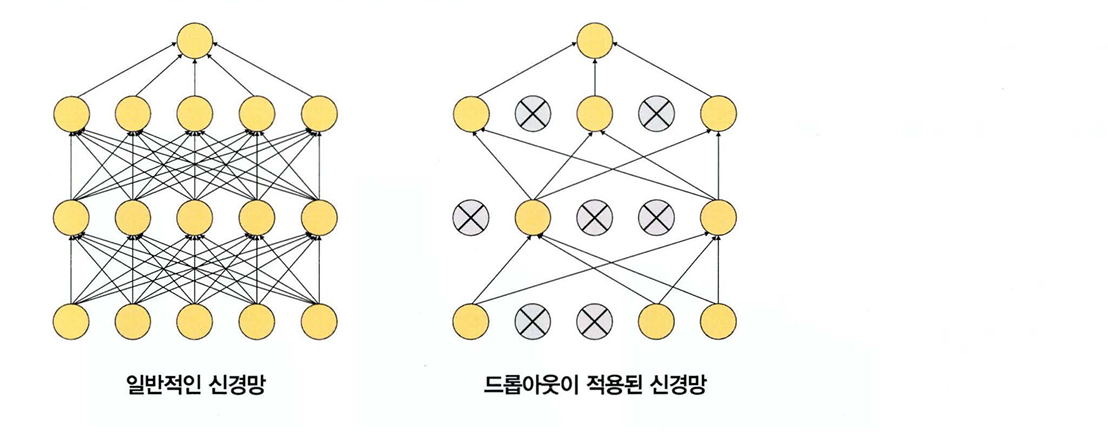

In [2]:
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)    # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

**기울기 소멸 문제 발생**
- 기울기 소멸 문제는 은닉층이 많은 신경망에서 주로 발생하는데, 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상이다.
- 기울기 소멸 문제는 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수를 사용하면 해결할 수 있다.

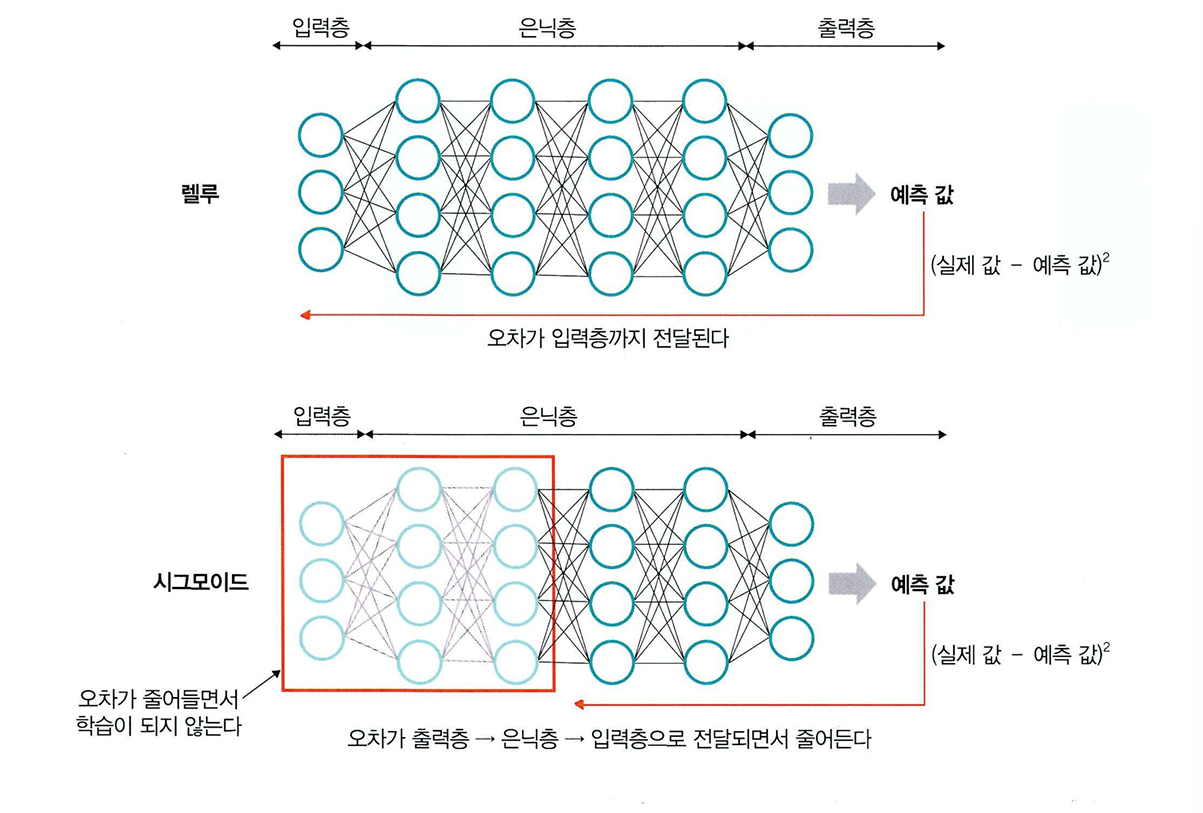

**성능이 나빠지는 문제 발생**
- 경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복하는데, 이때 성능이 나빠지는 문제가 발생한다.

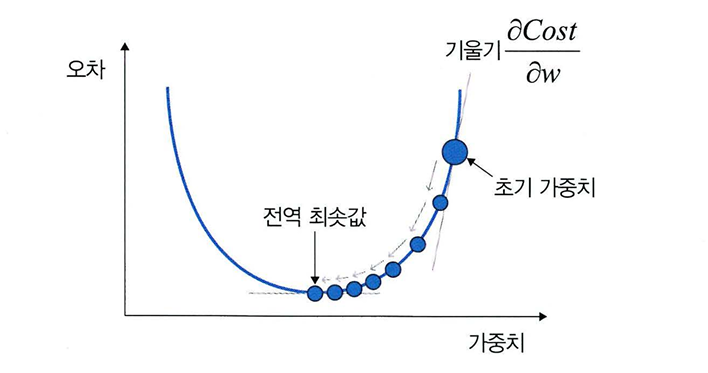

이러한 문제점을 개선하고자 확률적 경사 하강법과 미니 배치 경사 하강법을 사용한다.

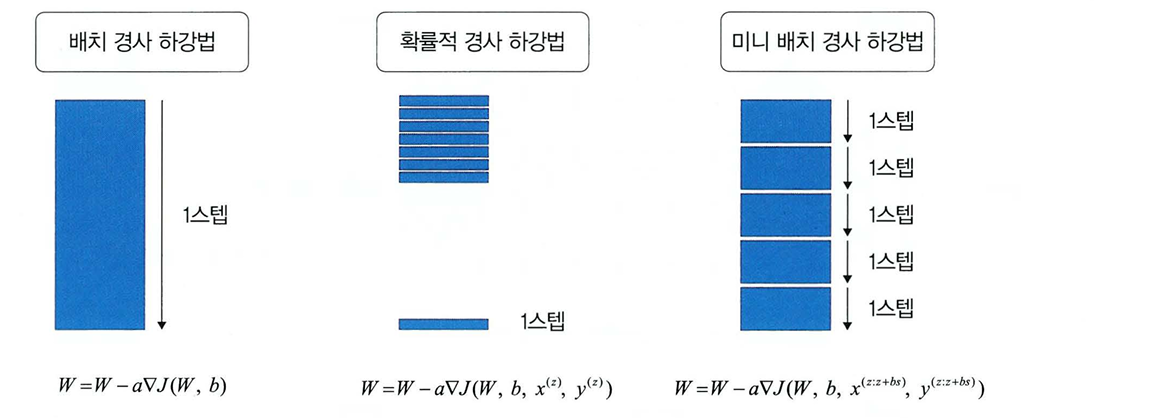

***배치 경사 하강법***
- 전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법이다.
- 즉, 전체 훈련 데이터셋에 대한 가중치를 편미분하는 방법이다.

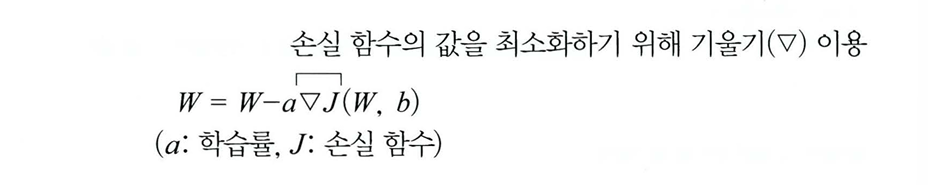

- 배치 경사 하강법은 한 스텝에 모든 훈련 데이터셋을 사용하므로 학습이 오래 걸리는 단점이 있다.

***확률적 경사 하강법***
- 임의로 선택한 데이터에 대해 기울기를 계산하는 방법으로 적은 데이터를 사용하므로 빠른 계산이 가능하다.

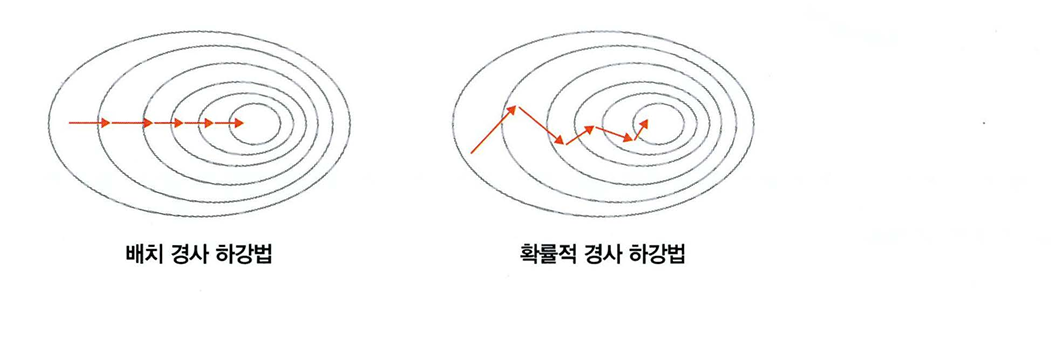

***미니 배치 경사 하강법***
- 전체 데이터셋을 미니 배치 여러개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해서 학습하는 방법이다.
- 미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, 확률적 경사 하강법보다 안정적이라는 장점이 있다.

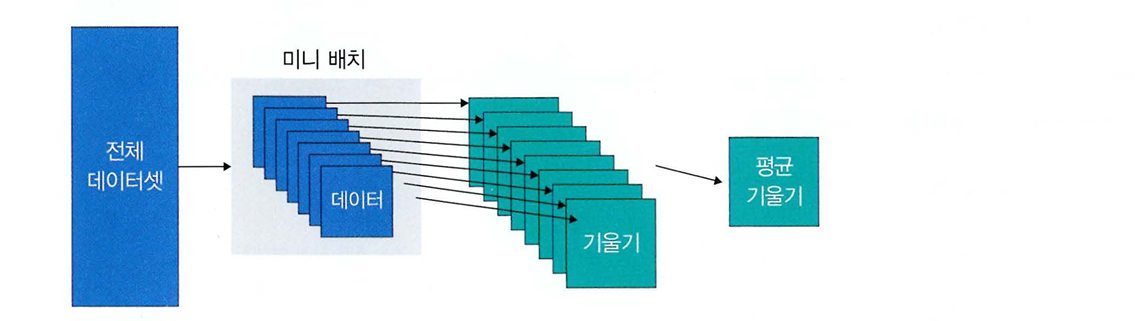

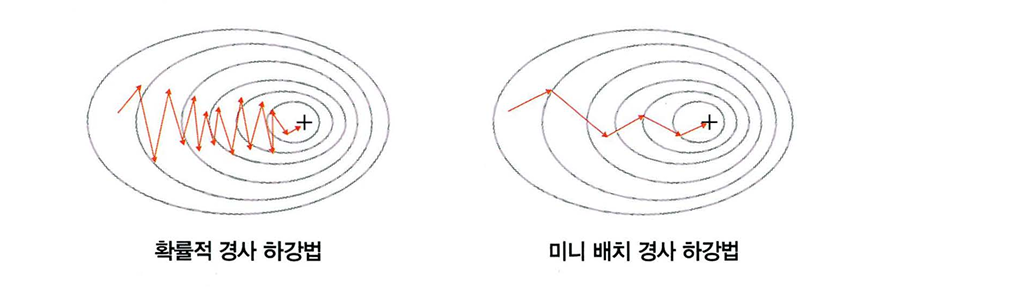


```
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y
dataset = CustomDataset()
dataloader = DataLoader(dataset,       # 데이터셋
                        batch_size=2,  # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
                        shuffle=True)  # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴
```



**4.2.4 딥러닝을 사용할 때 이점**

**특성추출**
- 데이터별로 어떤 특징을 가지고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업을 특성 추출이라고 한다.

**빅데이터의 효율적 활용**
- 딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상된다.
- 즉, 확보된 데이터가 적다면 딥러닝의 성능 향상을 기대하기 힘들다.

# **4.3 딥러닝 알고리즘**

**4.3.1 심층 신경망**
- 심층 신경망은 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망이다.
- 심층 신경망은 다수의 은닉층을 추가했기 때문에 별도의 트릭 없이 비선형 분류가 가능하다.
- 다수의 은닉층을 두었기 때문에 다양한 비선형적 관계를 학습할 수 있는 장점이 있지만, 학습을 위한 연산량이 많고 기울기 소멸 문제 등이 발생할 수 있다.

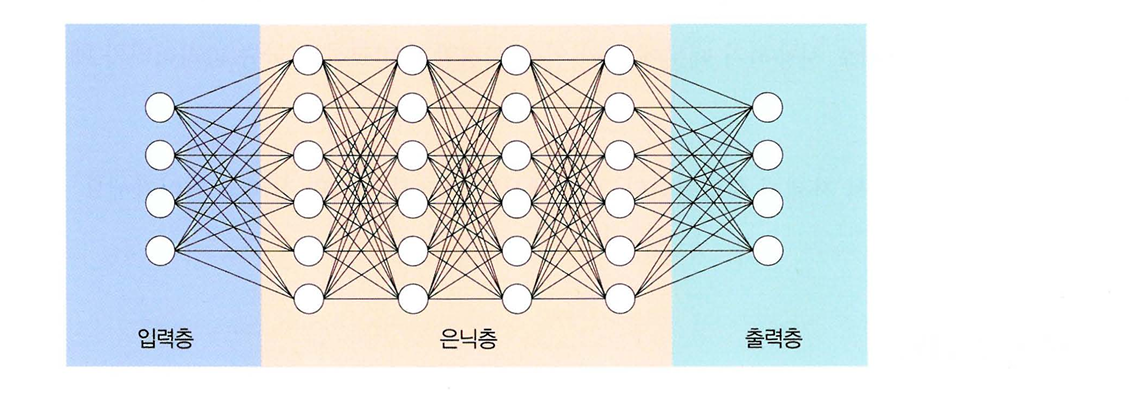

**4.3.2 합성곱 신경망**
- 합성곱 신경망은 합성곱층과 풀링층을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘이다.
- 영상 및 사진이 포함된 이미지 데이터에서 객체를 탐색하거나 객체 위치를 찾아내는데 유용한 신경망이다.

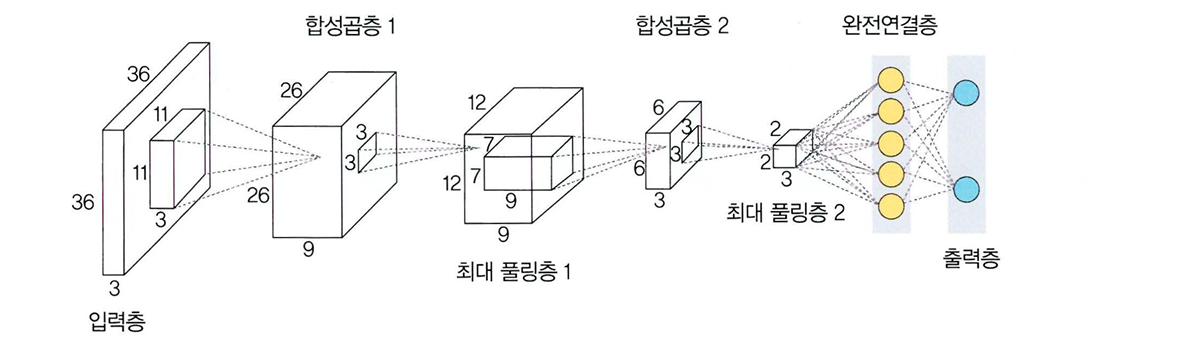

- 합성곱 신경망 : LeNet-5, AlexNet
- 신경망 : VGG, GoogleLeNet, ResNet

기존 신경망과 비교하여 다음과 같은 차별성이 있다.
- 각 층의 입출력 형상을 유지한다.
- 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식한다.
- 복수 필터로 이미지의 특징을 추출하고 학습한다.
- 추출한 이미지의 특징을 모으고 강화하는 풀링층이 있다.
- 필터를 공유 파라미터로 사용하기 때문에 일반 인공 신경망과 비교하여 학습 파라미터가 매우 적다.

**4.3.3 순환 신경망**
- 순환 신경망은 시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망이다.

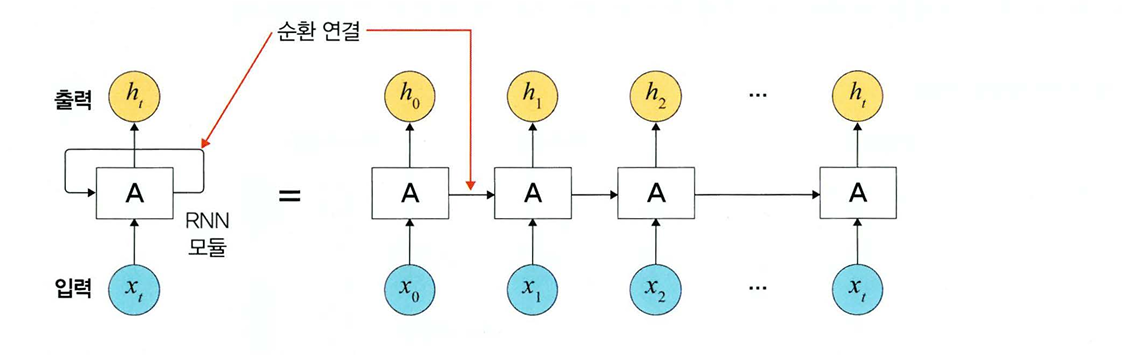

순환 신경망의 특징은 다음과 같다.
  - 시간성을 가진 데이터가 많다.
  - 시간성 정보를 이용하여 데이터의 특징을 잘 다룬다.
  - 시간에 따라 내용이 변하므로 데이터는 동저깅고, 길이가 가변적이다.
  - 매우 긴 데이터를 처리하는 연구가 활발히 진행되고 있다.

**4.3.4 제한된 볼츠만 머신**
- 볼츠만 머신은 가시층과 은닉층으로 구성된 모델이다.

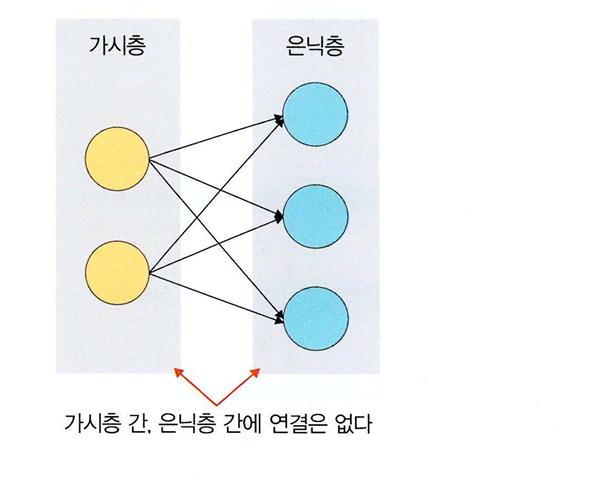

제한된 볼츠만 머신의 특징은 다음과 같다.
  - 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용한다.
  - 기울기 소멸 문제를 해결하기 위해 사전 학습 용도로 활용 가능하다.
  - 심층 신뢰 신경망의 요소로 활용된다.

**4.3.5 심층 신뢰 신경망**
- 심층 신뢰 신경망은 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망이다.

심층 신뢰 신경망의 학습 절차는 다음과 같다.
  - 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련한다.
  - 첫 번째 층 입력 데이터와 파라미터를 고정하여 두 번째 층 제한된 볼츠만 머신을 사전 훈련한다.
  - 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아 올려 전체 DBN을 완성한다.

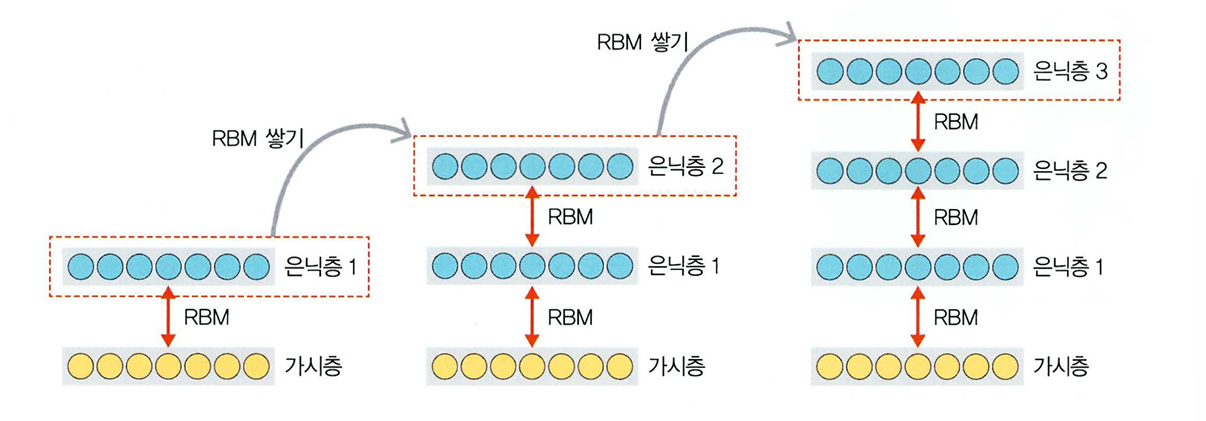

심층 신뢰 신경망의 특징은 다음과 같다.
  - 순차적으로 심층 신뢰 신경망을 학습시켜 가면서 계층적 구조를 생성한다.
  - 비지도 학습으로 학습한다.
  - 위로 올라갈수록 추상적 특성을 추출한다.
  - 학습된 가중치를 다층 퍼셉트론의 가중치 초깃값으로 사용한다.

# **4.4 우리는 무엇을 배워야 할까?**

- 머신 러닝과 딥러닝은 우리가 얻고 싶은 결과를 도출하기 위한 도구이다.
- 따라서, 어떤 도구를 선택했을 때 더 좋은 성능과 효과를 얻을 수 있을지는 데이터를 수집하고 분석하는 사람만 알 수 있다.